In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load your dataset
df = pd.read_csv('datasets/bank-direct-marketing-campaigns.csv')

# Initialize LabelEncoder
le = LabelEncoder()

In [2]:
df.columns
df.drop(['month', 'day_of_week','previous',
       'poutcome','euribor3m', 'nr.employed'],axis=1)

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,1,999,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,1.1,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,1,999,-1.1,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,1,999,-1.1,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,2,999,-1.1,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,1,999,-1.1,94.767,-50.8,yes


In [3]:
# Encode all columns with categorical textual data
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [4]:
categorical_cols


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [5]:
# Splitting the dataset into features and target variable
X = df.drop('y', axis=1)  # 'y' is the target variable
y = df['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust the number of trees and random state.
rf_clf.fit(X_train, y_train)

# Predictions
predictions = rf_clf.predict(X_test)

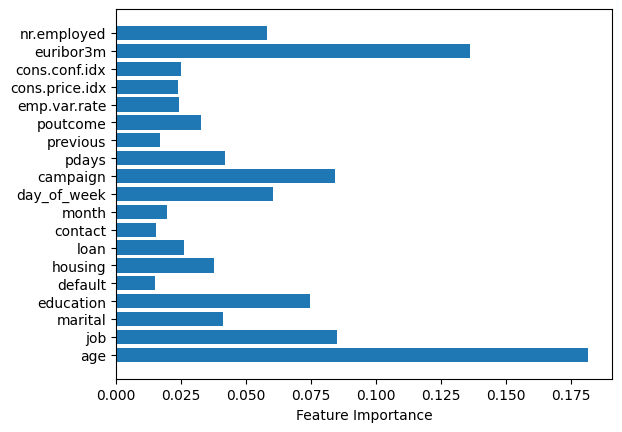

In [6]:
import matplotlib.pyplot as plt
feature_importances = rf_clf.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.show()


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.54      0.29      0.38       935

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



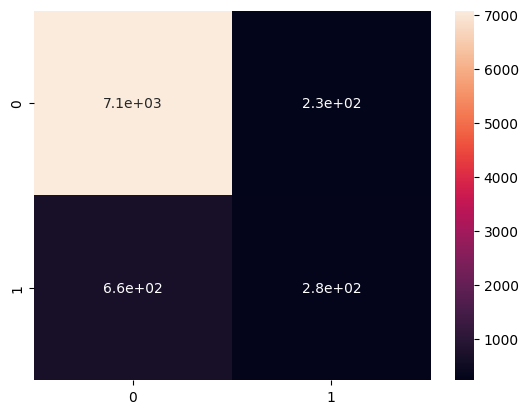

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()


In [8]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.891964068948774
